<a href="https://colab.research.google.com/github/luster31/Luster/blob/main/Reyes_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
print("--- 1. Data Collection and Importing ---")
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"

--- 1. Data Collection and Importing ---


In [5]:
df = pd.read_csv(url)

In [6]:
try:
    print("Titanic dataset loaded successfully from URL.")
except Exception as e:
    print(f"Error loading Titanic dataset from URL: {e}")

Titanic dataset loaded successfully from URL.


In [8]:
print("\n--- 2. Data Cleaning and Transformation ---")


--- 2. Data Cleaning and Transformation ---


In [7]:
print("\na. First 5 rows of the dataset:")


a. First 5 rows of the dataset:


In [9]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [10]:
initial_rows = df.shape[0]

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
rows_after_dropping_duplicates = df.shape[0]

In [13]:
if initial_rows > rows_after_dropping_duplicates:
    print(f"\nb. {initial_rows - rows_after_dropping_duplicates} duplicate rows were found and removed.")

In [14]:
print("\nb. No duplicate rows found.")


b. No duplicate rows found.


In [15]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [16]:
print("\nc. Value counts after converting 'Sex' to numerical (0=male, 1=female):")


c. Value counts after converting 'Sex' to numerical (0=male, 1=female):


In [17]:
print(df['Sex'].value_counts())

Sex
0    577
1    314
Name: count, dtype: int64


In [18]:
print("\n--- 3. Handling Missing Data and Outliers ---")


--- 3. Handling Missing Data and Outliers ---


In [19]:
print("\na. Checking for missing values:")


a. Checking for missing values:


In [20]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [21]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

In [22]:
mean_age = df['Age'].mean()

In [23]:
df['Age'] = df['Age'].fillna(mean_age)

In [24]:
print(f"\nMissing 'Age' values filled with mean age: {mean_age:.2f}")


Missing 'Age' values filled with mean age: 29.70


In [25]:
if df['Embarked'].isnull().any():
    most_frequent_embarked = df['Embarked'].mode()[0]

In [26]:
df['Embarked'] = df['Embarked'].fillna(most_frequent_embarked)

In [27]:
print(f"Missing 'Embarked' values filled with mode: {most_frequent_embarked}")

Missing 'Embarked' values filled with mode: S


In [28]:
if df['Fare'].isnull().any():
    median_fare = df['Fare'].median()

In [29]:
df['Fare'].fillna(median_fare, inplace=True)

NameError: name 'median_fare' is not defined

In [30]:
print(f"Missing 'Fare' values filled with median fare: {median_fare:.2f}")

NameError: name 'median_fare' is not defined

In [31]:
print("\nNumber of missing values after handling:")


Number of missing values after handling:


In [32]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [33]:
print("\n--- 4. Feature Selection and Engineering ---")


--- 4. Feature Selection and Engineering ---


In [34]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [35]:
print("\na. First 5 'FamilySize' values (SibSp + Parch + 1):")


a. First 5 'FamilySize' values (SibSp + Parch + 1):


In [36]:
print(df['FamilySize'].head())

0    2
1    2
2    1
3    2
4    1
Name: FamilySize, dtype: int64


In [ ]:
print("\na. Summary Statistics for 'Age' and 'Fare':")


a. Summary Statistics for 'Age' and 'Fare':


In [37]:
age_mean = df['Age'].mean()

In [38]:
age_median = df['Age'].median()

In [39]:
fare_mean = df['Fare'].mean()

In [40]:
fare_median = df['Fare'].median()

In [41]:
print(f"  Age: Mean = {age_mean:.2f}, Median = {age_median:.2f}")

  Age: Mean = 29.70, Median = 29.70


In [42]:
print(f"  Fare: Mean = {fare_mean:.2f}, Median = {fare_median:.2f}")

  Fare: Mean = 32.20, Median = 14.45


In [43]:
plt.style.use('seaborn-v0_8-darkgrid')

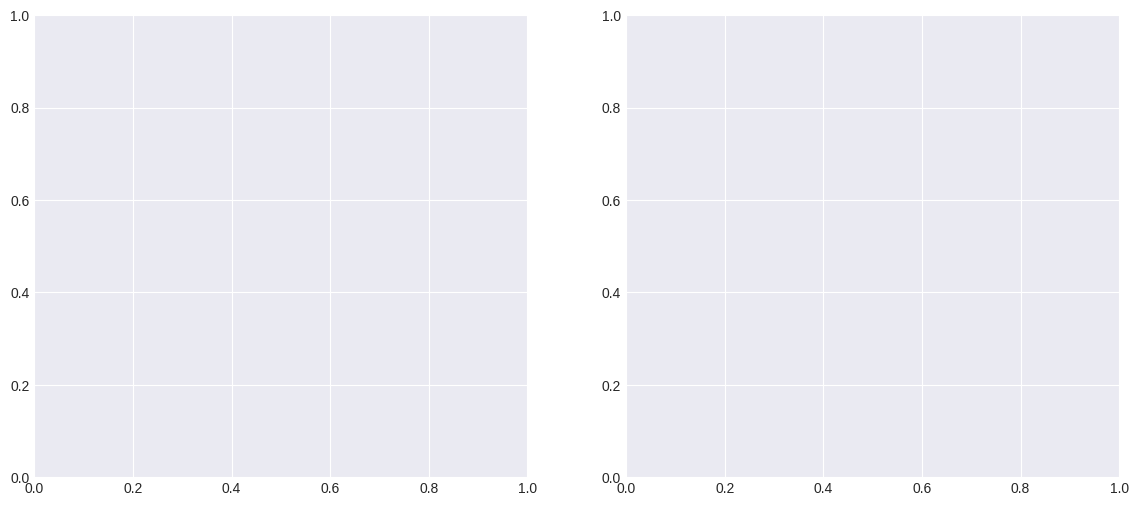

In [44]:
fig_hist, axes_hist = plt.subplots(1, 2, figsize=(14, 6))

In [45]:
fig_hist.suptitle('Distribution of Age and Fare', fontsize=16, y=1.02)

Text(0.5, 1.02, 'Distribution of Age and Fare')

In [46]:
sns.histplot(df['Age'], kde=True, ax=axes_hist[0], color='lightcoral', bins=20)

<Axes: xlabel='Age', ylabel='Count'>

In [47]:
axes_hist[0].set_title('Distribution of Age', fontsize=14)

Text(0.5, 1.0, 'Distribution of Age')

In [48]:
axes_hist[1].set_xlabel('Fare', fontsize=12)

Text(0.5, 4.444444444444441, 'Fare')

In [49]:
axes_hist[1].set_ylabel('Count', fontsize=12)

Text(596.2626262626261, 0.5, 'Count')

In [50]:
axes_hist[1].axvline(df['Fare'].mean(), color='darkgreen', linestyle='dashed', linewidth=1, label=f'Mean Fare: {df["Fare"].mean():.2f}')

In [51]:
axes_hist[1].legend()

In [52]:
axes_hist[1].grid(axis='y', linestyle='--', alpha=0.7)

In [53]:
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap

<Figure size 640x480 with 0 Axes>

In [54]:
plt.show()

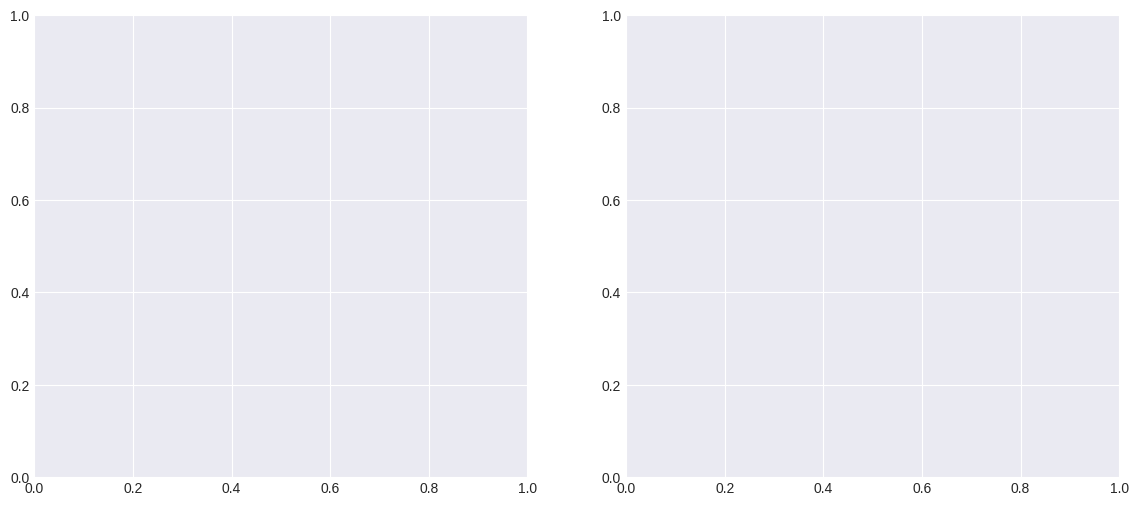

In [55]:
fig_bar, axes_bar = plt.subplots(1, 2, figsize=(14, 6))

In [56]:
fig_bar.suptitle('Survival Rates by Passenger Class and Sex', fontsize=16, y=1.02)

Text(0.5, 1.02, 'Survival Rates by Passenger Class and Sex')

In [57]:
sns.barplot(x='Pclass', y='Survived', data=df, ax=axes_bar[0], palette='viridis')

/tmp/ipython-input-2209340434.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=df, ax=axes_bar[0], palette='viridis')


<Axes: xlabel='Pclass', ylabel='Survived'>

In [58]:
axes_bar[0].set_title('Survival Rate by Passenger Class', fontsize=14)

Text(0.5, 1.0, 'Survival Rate by Passenger Class')

In [59]:
axes_bar[0].set_xlabel('Passenger Class (1=1st, 2=2nd, 3=3rd)', fontsize=12)

Text(0.5, 4.444444444444441, 'Passenger Class (1=1st, 2=2nd, 3=3rd)')

In [60]:
axes_bar[0].set_ylabel('Survival Rate', fontsize=12)

Text(4.444444444444448, 0.5, 'Survival Rate')

In [61]:
axes_bar[0].set_ylim(0, 1) # Set y-axis limits for survival rate

(0.0, 1.0)

In [62]:
axes_bar[0].grid(axis='y', linestyle='--', alpha=0.7)

In [63]:
sns.barplot(x='Sex', y='Survived', data=df, ax=axes_bar[1], palette='magma')

/tmp/ipython-input-1460735370.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=df, ax=axes_bar[1], palette='magma')


<Axes: xlabel='Sex', ylabel='Survived'>

In [64]:
axes_bar[1].set_title('Survival Rate by Sex', fontsize=14)

Text(0.5, 1.0, 'Survival Rate by Sex')

In [65]:
axes_bar[1].set_xlabel('Sex (0=Male, 1=Female)', fontsize=12)

Text(0.5, 4.444444444444441, 'Sex (0=Male, 1=Female)')

In [66]:
axes_bar[1].set_ylabel('Survival Rate', fontsize=12)

Text(596.2626262626261, 0.5, 'Survival Rate')

In [67]:
axes_bar[1].set_ylim(0, 1) # Set y-axis limits for survival rate

(0.0, 1.0)

In [68]:
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap

<Figure size 640x480 with 0 Axes>

In [69]:
print("\nFinal DataFrame head after all transformations:")
print(df.head())


Final DataFrame head after all transformations:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare Cabin Embarked  FamilySize  
0         A/5 21171   7.2500   NaN        S           2  
1          PC 17599  71.2833   C85        C           2  
2  STON/O2. 3101282   7.9250   NaN        S           1  
3            11